# Unsupervised Learning with K-means

**Attention:** The code in this notebook creates Google Cloud resources that can incur costs.

Refer to the Google Cloud pricing documentation for details.

For example:

* [Vertex AI Pricing](https://cloud.google.com/vertex-ai/pricing)


## Install required packages

In [6]:
# ! pip3 install --upgrade xgboost

## Restart the kernel

The code in the next cell will retart the kernel, which is sometimes required after installing/upgrading packages.

**When prompted, click OK to restart the kernel.**

The sleep command simply prevents further cells from executing before the kernel restarts.

In [7]:
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)


In [8]:
# import time
# time.sleep(10)

# (Wait for kernel to restart before proceeding...)

In [9]:
# Import required resources
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd # for exploring our data
import matplotlib.pyplot as plt # for plotting our clusters
from mpl_toolkits.mplot3d import Axes3D # Specifically for creating a 3-D graph

In [10]:
# Load the Iris dataset:
iris = load_iris()
# Assign the data to a variable so we can start to use it:
iris_data = iris.data

In [11]:
# Convert the dataset to a pandas data frame for analysis:
iris_df = pd.DataFrame(iris_data)
# Use the info() function to get some information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
# Preview the data
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(iris_data)
kmeans_model.predict(iris_data)
labels = kmeans_model.labels_

Text(0.5, 0, 'Sepal width')

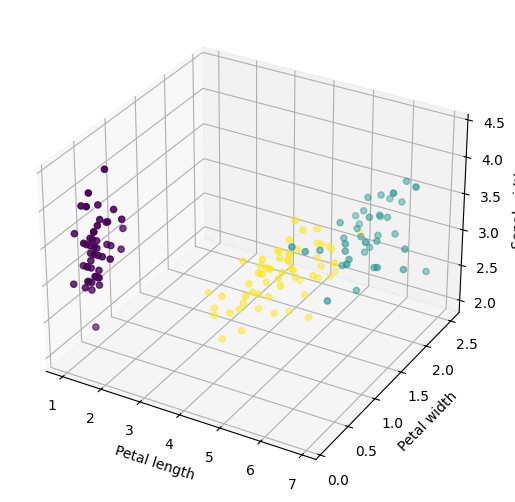

In [14]:
# Create a figure object:
fig = plt.figure() 
# Define the axes (note: the auto_add_to_figure option will default to False from mpl3.5 onwards):
axes = Axes3D(fig, auto_add_to_figure=False) 
# Add the axes to the figure:
fig.add_axes(axes) 
# Create the scatter plot to graph the outputs from our K-means model:
axes.scatter(iris_data[:, 2], iris_data[:, 3], iris_data[:, 1], c=labels.astype(float)) 
# Set the labels for the X, Y, and Z axes:
axes.set_xlabel("Petal length") 
axes.set_ylabel("Petal width") 
axes.set_zlabel("Sepal width")  

# Supervised Learning: Linear Regression with scikit-learn

In [15]:
# Import necessary resources
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Info : https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset, we can see that the features are:
- A. Sepal length in cm
- B. Sepal width in cm
- C. Petal length in cm
- D. Petal width in cm

In [18]:
# Set the target variable
target = iris_df[[2]]

In [19]:
# Define the input_features
input_feats = iris_df[[0, 1, 3]]

In [20]:
# Split the dataset for training and testing
input_train, input_test, target_train, target_test=train_test_split(input_feats,target,test_size=0.2)

In [21]:
# Create an instance of a LinearRegression model
lreg_model = LinearRegression()

# Train the model by fitting it to the training data
lreg_model.fit(input_train,target_train)

# Use the test set to generate predictions
target_predictions=lreg_model.predict(input_test)

In [22]:
# Preview the predictions in a pandas data frame
pred_df = pd.DataFrame(target_predictions[0:5])
pred_df.head()

,0
0,3.812485
1,3.973757
2,4.044921
3,4.432836
4,3.704052


In [23]:
# Preview the known, correct answers
target_test.head()

,2
80,3.8
94,4.2
92,4.0
74,4.3
95,4.2


In [24]:
# Calculate the Mean Squared Error (MSE)
mean_squared_error(target_test,target_predictions)

np.float64(0.04111548387939501)

# Supervised Learning: Multi-class Classification with XGBoost

In [25]:
# I got an error in loading xgboost and ran this
#  brew install libomp

# Import required resources
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [26]:
# Assign the target variable
iris_classes = iris.target

In [27]:
# View the classes
iris_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Split the data for training and testing
xgb_input_train, xgb_input_test, xgb_target_train, xgb_target_test = train_test_split(iris_data, iris_classes, test_size=.2)

In [29]:
# create model instance
xgbc = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')

In [30]:
# Train the model
xgbc.fit(xgb_input_train, xgb_target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [31]:
# make predictions
xgb_predictions = xgbc.predict(xgb_input_test)

In [32]:
# View the predictions
xgb_predictions

array([0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2,
       2, 1, 0, 2, 1, 0, 2, 2], dtype=int32)

In [33]:
# View the known, correct answers
xgb_target_test

array([0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2,
       2, 1, 0, 2, 1, 0, 1, 2])

In [34]:
# Calculate the accuracy of the predictions
accuracy_score(xgb_target_test,xgb_predictions)

0.9333333333333333